### Laily's lab week 4
Practice decision tree classifiers (Binary classifier)

행렬 (Matrix)
행렬이란 직사각형 모양의 숫자의 배열입니다. 이때 여러 숫자들을 모아서 한번에 표현했다는것에 주목

왜냐면 행렬은 다량의 데이터를 한번에 표현할 수 있는 좋은 수단. -> 표 (Graph)와 행렬 (Matrix)의 차이를 명확하게 알아야한다.

표는 여러가지 데이털르 효과적으로 시각화하기 위함
행렬은 다량의 데이터레 대한 계산을 편리하게 하기 위함


### 백터(Vector)
Vector는 N x 1 차원의 행렬(matrix)입니다. 즉 하나의 열을 가지며 여러개의 행만을 가지기 때문에 백터 내부 데이터의 수가 곧 벡터의 차원(dimension)이된다

### What is an AI model?

An independant agent 
 - it has a brain 

In our course, because we are learning supervised Machine Learning , Our Ai models will always also be trained on a data set.

In [5]:
# Import the necessary libraries
import numpy as np # This library allows us to work with arras as vectors
# A vector is 1 row in our matrix. In other words, its a 1d array within a multiple dimensional array

import matplotlib.pyplot as plt # This library allows us to plot graphs : line bar (hisgotram) box plot

from sklearn.tree import DecisionTreeClassifier # DecisionTreeclassifier is a this example in the base model
#This class contains the code for a binary classifier that we can uses if we
# instantiate an object and then train that classifier object with some data

from sklearn.model_selection import train_test_split # This library allows us to split our data into training and testing data.

from sklearn import datasets # Usually we will not import the dataset from Sklearn, rather it will be imported from our company's specific data collection source

from sklearn.tree import plot_tree # This functio is used to plot a DecisionTreeClassifier 

from sklearn.metrics import accuracy_score #This function is the automatic version of comparing the answers given in dataset , vs the predictions made by the algorithm
# How many answers did it get right out of all answers.





In [6]:
# Upload the iris dataset - although we'll upload it from sklearn, this is not common practice
datasets.load_iris() # This function will load the iris dataset from the sklearn library
all_irises = datasets.load_iris() 
print(all_irises) 

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [14]:
# seperate the data into x and y (features vs labels)
#X = all_irises["data"] # 2D array of all the features
X = all_irises.data # This is the object oriented way of writing the same code as above
# 객체 지향 방식으로 2D 배열에서 특징 추출 
Y = all_irises["target"] # 1D array of all the labels
# 비객체 지향 방식으로 레이블 추출 
target_names = all_irises["target_names"] # 1D array of all the label names
# X 의 데이터 유형을 출력
feature_names = all_irises["feature_names"] # 1D array of all the feature names
# Y 의 데이터 유형을 출력




# Printing out the data types included in the X values (features)
# Last week, we saw we can do this with np.dtype
print(type(X))
# print(np.dtype(float)) 
# This is for creating and specifying the data type of data -> In the situation where creating dummy data

print(type(Y))
# The function below will check the size of the X features , and the size of the Y answers
print(X.shape)   # 150 is rows and 4 is columns 150 flowers , 4 features 
# (because it is 1 less than the number of columns, as the last column is the answer)
# answer 은 y 배열 즉 레이블을 의미합니다. 이 'answer'은 머신러닝 문제에서 예측해야 하는 목표값 (target)입니다
# 예를 들어 주어진 꽃의 다양한 특징 (X) 을 바탕으로 꽃이 어떤 종류인지 를 예측하려고할떄, 그꽃의 실제 종류가 
# 'answer 또는 레이블 입니다 

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)


In [15]:
# split the original data set into the training vs testing sets
# test_size 는 전체 데이터의 30%를 테스트용으로 사용 , 나머지 70%는 훈련용으로 사용 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# random_state is a seed to provide a metaphorical baby brain with some random personality state to start with
# when we split, we will extract Y values as well Y_train(70) and Y_test(30) , X_train(70), X_test(30)


# This is the birth of the new AI agent with a random seed personality of 11 
aiAgentSmith = DecisionTreeClassifier() # instantiate the object

# Next step is to train the AI agent so that it goes from the baby brain to the adult brain
aiAgentSmith.fit(X_train, Y_train) # train the model

# Next step is to test
Y_pred = aiAgentSmith.predict(X_test) # test the model 
# why we only use X_test? Because we want to see how well the model can predict the X_test values
# without having the answers to check 
#ex) Student takes a test, but their answers are compared at the end to give a mark

print(Y_test)
print(Y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [18]:
# Check the metrics of the algorithm to see how well it performed
# This function will compare the Y_test values with the Y_pred values and give 
# us a percentage of how many it got right)
accuracy_of_model = accuracy_score(Y_test, Y_pred) 
print(f"accuracy_score: {accuracy_of_model* 100:.2f}%")

accuracy_score: 100.00%


### 결정트리 를 시각화 ( Visualizing Decision Tree)

plot_tree(aiAgentSmith, filled=True, feature_names=feature_names, class_name = target_names)

aiAgnetSmith : 앞에서 학습시킨 결정트리 모델 - 이모델이 어떻게 데이터를 나누는지 시각적으로 보여줌 

filled = True : 트리의 각 노드를 색상으로 채워서 노드가 어떤 클래스(레이블)로 분류되는지 시각적으로 구분할수있게 해준다 - 노드의 색상은 트리 모델이 얼마나 해당 클래스에 속하는지의 확신 정도에 따라 달라짐

feature_names=feature_names : 트리의 각 분기점에서 사용하는 "" 특징 이름 "" 을 지정
여기서 feature_names 는 꽃의 특징 이름이 들어감 


class_name = target_names : 트리의 최종노드 (리프 노드) 에서 예측되는 클래스이름 레이블을 표시해줌 
- 꽃의 종류 ( target_names )






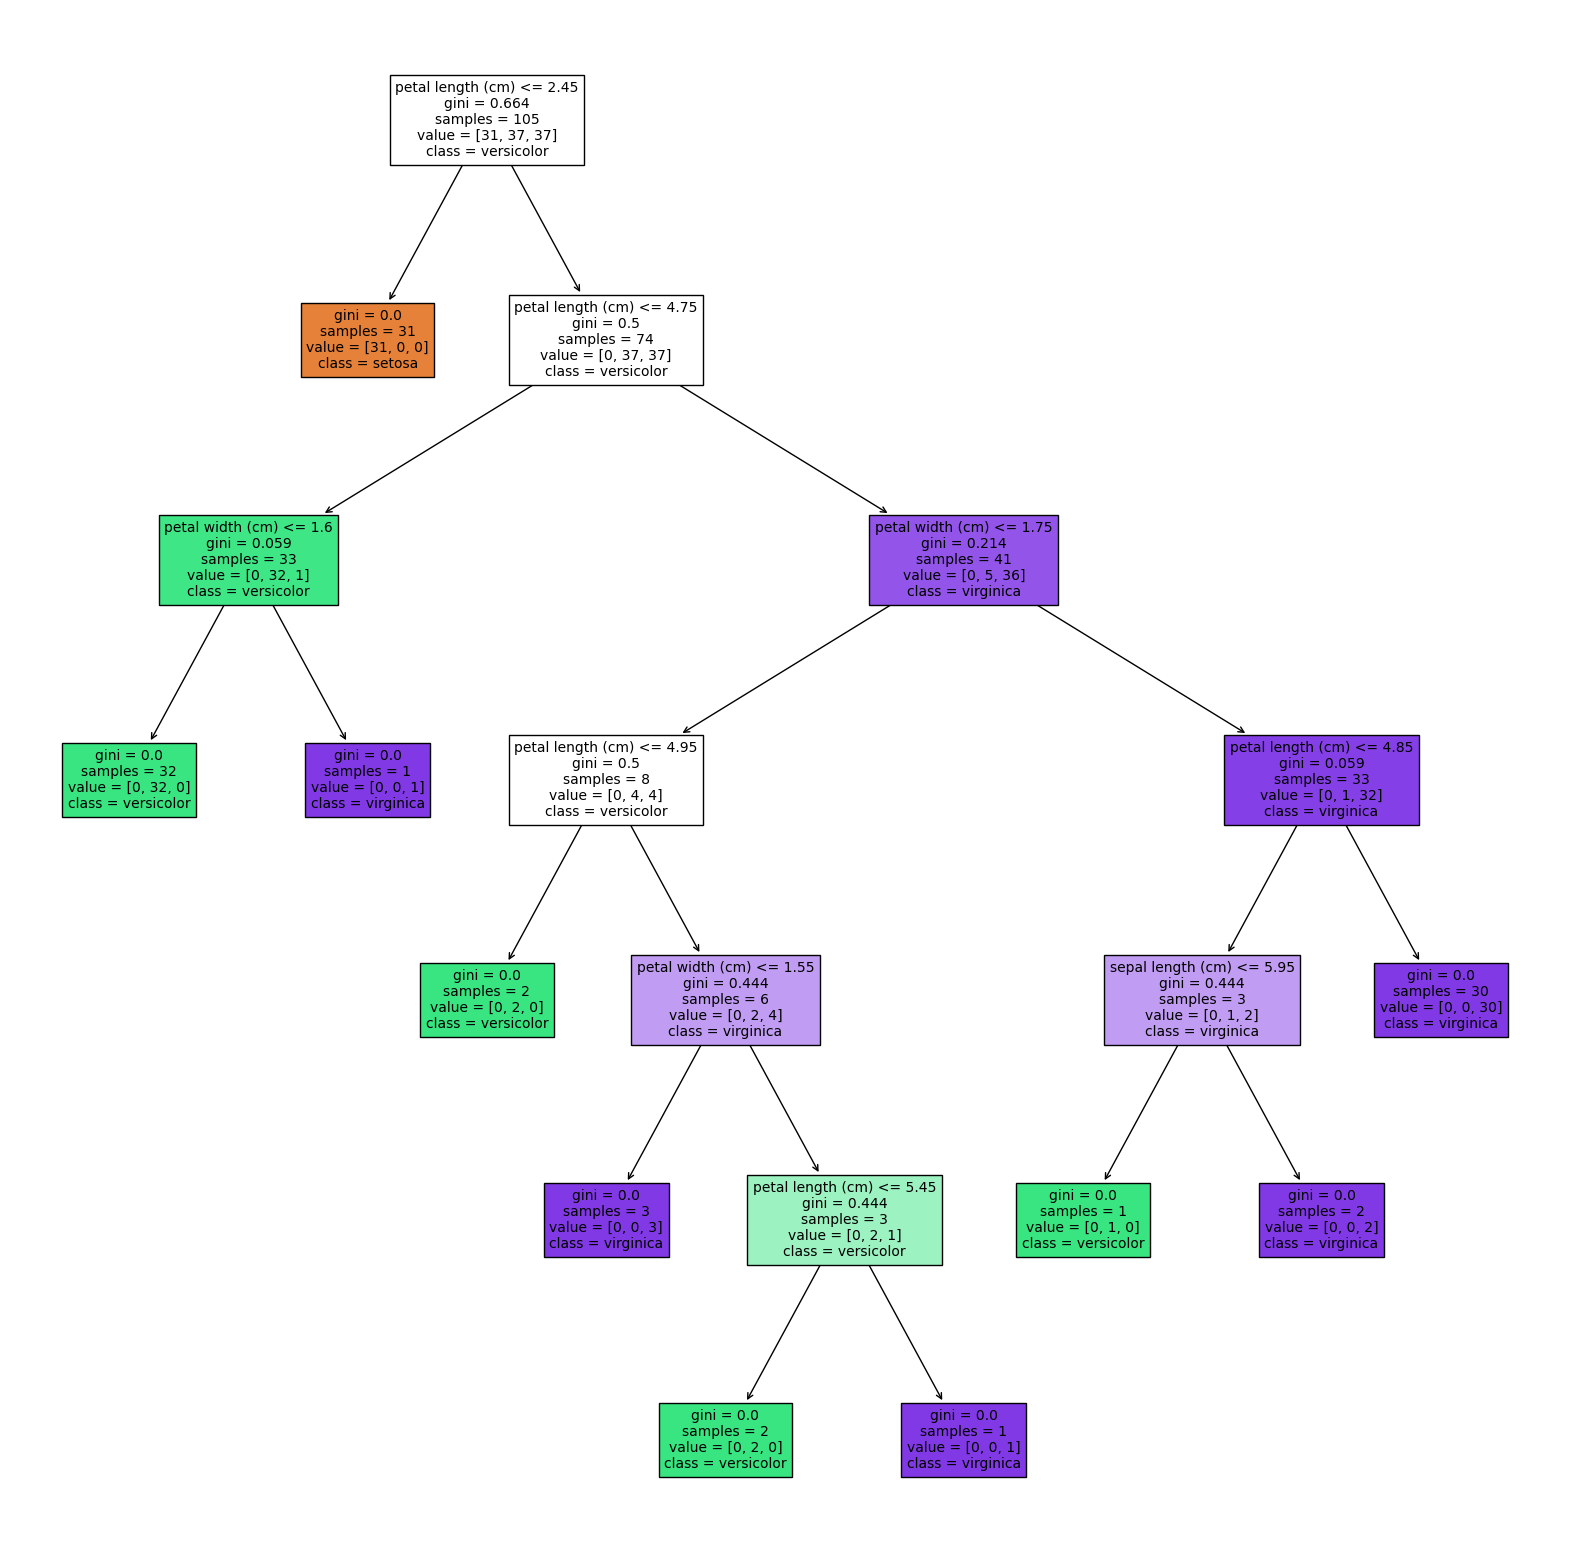

In [20]:
# Graph the Decision Tree classifier
# This function will plot the decision tree classifier
# figsize is the size of the graph figSize = (width, height) 
plt.figure(figsize=(20,20))
plot_tree(aiAgentSmith, filled=True, feature_names=feature_names, class_names=target_names, fontsize=10)
plt.show()